In [1]:
import pandas as pd
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D

In [2]:
from keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [4]:
x_train=x_train.astype('float32')

In [5]:
import matplotlib.pyplot as plt

In [6]:
names=['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
x_test=x_test.astype('float32')
x_test.shape

(10000, 32, 32, 3)

In [8]:
x_train=x_train.reshape(x_train.shape[0],32, 32, 3)
x_test=x_test.reshape(x_test.shape[0], 32, 32, 3)

In [9]:
y_test.shape

(10000, 1)

In [10]:
y_train.shape

(50000, 1)

In [11]:
x_train/=255

In [12]:
val_y_test=y_test[-500:]
val_y_test.shape

(500, 1)

In [13]:
val_x_test=x_test[-500:]
val_x_test.shape

(500, 32, 32, 3)

In [30]:
val_x_test/=255

In [14]:
y_test=y_test[:-500]
y_test.shape

(9500, 1)

In [15]:
x_test=x_test[:-500]
x_test.shape

(9500, 32, 32, 3)

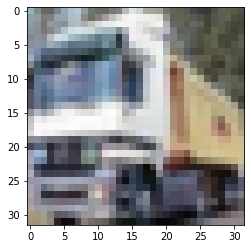

In [16]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(x_train[1])

In [17]:
x_train.shape

(50000, 32, 32, 3)

In [18]:
x_test/=255

In [19]:
classsize=10
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [20]:
model_2=Sequential()

In [21]:
model_2.add(Conv2D(64,(3,3),strides=(1,1),input_shape=(32, 32, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Conv2D(128,(3,3),strides=(1,1),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Conv2D(256,(3,3),strides=(1,1),activation='relu'))
model_2.add(MaxPool2D(pool_size=(2,2)))

In [22]:
model_2.add(Flatten())

In [23]:
model_2.add(Dense(32, activation='relu'))
#model_2.add(Dense(64, activation='relu'))

In [24]:
model_2.add(Dense(10, activation='softmax'))

In [25]:
model_2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [26]:
model_2.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 88s 223ms/step - loss: 1.6758 - accuracy: 0.3841 - val_loss: 1.3270 - val_accuracy: 0.5282
Epoch 2/10
391/391 [==============================] - 85s 216ms/step - loss: 1.2405 - accuracy: 0.5597 - val_loss: 1.1328 - val_accuracy: 0.6058
Epoch 3/10
391/391 [==============================] - 99s 253ms/step - loss: 1.0750 - accuracy: 0.6264 - val_loss: 1.0353 - val_accuracy: 0.6418
Epoch 4/10
391/391 [==============================] - 108s 277ms/step - loss: 0.9545 - accuracy: 0.6721 - val_loss: 0.9643 - val_accuracy: 0.6694
Epoch 5/10
391/391 [==============================] - 111s 284ms/step - loss: 0.8621 - accuracy: 0.7040 - val_loss: 0.9179 - val_accuracy: 0.6854
Epoch 6/10
391/391 [==============================] - 110s 282ms/step - loss: 0.7847 - accuracy: 0.7322 - val_loss: 0.8935 - val_accuracy: 0.6903
Epoch 7/10
391/391 [==============================] - 108s 277ms/step - loss: 0.7229 - accuracy: 0.7513 - val_loss: 0.8721 - va

In [32]:
pred=model_2.predict(val_x_test[:2])

1/1 [==============================] - 0s 56ms/step


truck


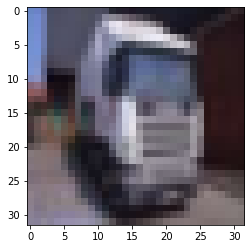

In [35]:
plt.imshow(val_x_test[0])
s=np.argmax(pred[0])
print(names[s])